# Laporan Proyek Machine Learning - Rizal Fadlullah



## 1. <a id='toc1_'></a>[Domain Proyek](#toc0_)

Jerawat adalah masalah kulit yang umum terjadi, terutama pada remaja dan dewasa muda. Perawatan jerawat lebih efektif jika dilakukan pada tahap awal perkembangannya. Namun, seringkali sulit untuk mengidentifikasi jerawat pada tahap awal, terutama ketika gejalanya masih subyektif atau kurang mencolok. Oleh karena itu, pengembangan sistem klasifikasi jerawat yang dapat mendeteksi jerawat pada tahap dini sangat penting untuk meningkatkan efektivitas perawatan dan mengurangi dampaknya pada kesehatan mental individu.

Dalam upaya untuk meningkatkan kemampuan deteksi dini jerawat, teknologi machine learning dan computer vision menawarkan pendekatan yang menjanjikan. Di dalam domain proyek ini, fokus utama adalah pada penggunaan arsitektur EfficientNet, sebuah model neural network yang terkenal karena efisiensinya dalam memproses gambar dengan kualitas tinggi (Tan & Le, 2019).

Arsitektur EfficientNet telah menunjukkan kinerja yang mengesankan dalam berbagai aplikasi pengolahan gambar, termasuk analisis medis seperti deteksi jerawat. Misitzis et al. (2020) menggunakan EfficientNet untuk analisis gambar kulit dalam deteksi dan klasifikasi jerawat dengan akurasi yang tinggi. Penelitian ini menegaskan potensi besar dalam penggunaan teknologi machine learning untuk mendukung diagnosis dini jerawat.

Dengan memanfaatkan keunggulan efisiensi dan performa yang ditawarkan oleh EfficientNet, proyek ini bertujuan untuk mengembangkan model klasifikasi dini jerawat yang dapat bekerja secara cepat dan akurat, bahkan pada data gambar kulit yang besar dan kompleks. Melalui penggunaan teknologi ini, diharapkan proyek ini dapat memberikan kontribusi yang signifikan dalam meningkatkan perawatan kesehatan kulit dan kesejahteraan individu.

## 2. <a id='toc2_'></a>[Business Understanding](#toc0_)
Jerawat merupakan masalah kulit umum yang dapat mempengaruhi kesehatan mental individu. Diagnosis dini jerawat penting untuk memberikan perawatan yang tepat waktu dan mengurangi dampak negatifnya. Namun, diagnosis jerawat pada tahap awal sering sulit dan dapat menyebabkan penundaan dalam perawatan.

Proyek ini bertujuan untuk mengembangkan sistem klasifikasi jerawat menggunakan teknologi machine learning dan computer vision. Dengan membangun model yang efisien dan akurat, proyek ini diharapkan dapat memberikan solusi untuk mendeteksi jerawat pada tahap dini, memungkinkan intervensi lebih awal dan perawatan yang tepat.
### 2.1. <a id='toc2_1_'></a>[Problem Statements](#toc0_)
Menjelaskan peryataan masalah latar belakang:
+ Tantangan Diagnosis Dini Jerawat: Diagnosis jerawat pada tahap awal sering sulit dan tidak konsisten, menyebabkan penundaan dalam perawatan dan memperburuk kondisi kulit.
+ Dampak Kesehatan Mental: Jerawat bukan hanya masalah kosmetik, tetapi juga dapat mempengaruhi kesehatan mental dan kesejahteraan individu, terutama remaja dan dewasa muda.
+ Perlunya Solusi Otomatis: Pengembangan sistem otomatis untuk klasifikasi dini jerawat menjadi penting untuk meningkatkan akurasi diagnosis dan mengurangi dampak negatifnya.
### 2.2. <a id='toc2_2_'></a>[Goals](#toc0_)
Menjelaskan tujuan dari pernyataan masalah:
+ Pengembangan Model Machine Learning: Membuat model machine learning yang mampu mengenali jerawat pada gambar kulit secara otomatis.
+ Tingkatkan Akurasi Model: Memastikan model memiliki tingkat akurasi yang tinggi dalam mengidentifikasi jerawat, bahkan pada gambar kulit yang beragam.
+ Solusi Mudah Digunakan: Membuat solusi yang mudah digunakan oleh individu dan profesional kesehatan untuk mendeteksi jerawat pada tahap dini.
### 2.3. <a id='toc2_3_'></a>[Solution statements](#toc0_)
+ Penggunaan EfficientNet: Memanfaatkan arsitektur neural network EfficientNet yang terkenal karena kemampuannya dalam mengenali pola pada gambar dengan efisien. Model ini akan dilatih menggunakan dataset gambar kulit untuk mengidentifikasi jerawat pada tahap awal dengan tingkat akurasi yang tinggi.
+ Rekomendasi Perawatan: Setelah mengenali jerawat pada gambar kulit, model akan memberikan rekomendasi perawatan yang sesuai. Rekomendasi ini akan disesuaikan dengan kondisi kulit individu dan tingkat keparahan jerawat, termasuk penggunaan produk perawatan kulit tertentu atau konsultasi dengan ahli dermatologi.
+ Implementasi dalam Aplikasi: Model klasifikasi yang telah dilatih akan diintegrasikan ke dalam sebuah aplikasi mobile yang mudah digunakan. Pengguna dapat dengan mudah mengambil foto kulit mereka sendiri menggunakan kamera ponsel mereka dan mengunggahnya ke aplikasi. Selanjutnya, aplikasi akan menggunakan model untuk mengidentifikasi jerawat pada gambar tersebut dan memberikan rekomendasi perawatan yang tepat.
## 3. <a id='toc3_'></a>[Data Understanding](#toc0_)
Dataset yang digunakan adalah dataset publik yang diambil dari platform Kaggle, sebuah komunitas online untuk para ahli data dan peneliti. Dataset ini dirancang khusus untuk tujuan pengenalan dan klasifikasi masalah jerawat pada kulit wajah.

Dataset ini terdiri dari gambar-gambar yang menampilkan kondisi kulit wajah manusia dengan tiga kelas utama, yaitu jerawat (acne), komedo (pimple), dan bintik hitam (spot). Setiap gambar dalam dataset ini telah dianotasi secara manual untuk mengidentifikasi dan membatasi area di mana jerawat, komedo, atau bintik hitam terdeteksi, menggunakan kotak pembatas (bounding box).
### 3.1. <a id='toc3_1_'></a>[Overview Data](#toc0_)

In [1]:
if 'google.colab' in str(get_ipython()):
  %pip install dagshub -q
  IN_COLAB = True
else:
  IN_COLAB = False

In [2]:
from dvc.api import DVCFileSystem
fs = DVCFileSystem("https://dagshub.com/izzalDev/acne-classification-v2",remote='origin')
print("Filesystem setup completed")

Filesystem setup completed


In [3]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import numpy as np
import random

labels_map = {'acne':0,'pimple':1,'spot':2}
with fs.open('data/raw/_annotations.csv') as f:  
    df = pd.read_csv(f)
df

,filename,width,height,label,xmin,ymin,xmax,ymax
0,Needhi-is-a-Student-from-Sunderpur_-Lakhan_jpg...,514,514,spot,293,388,314,406
1,Needhi-is-a-Student-from-Sunderpur_-Lakhan_jpg...,514,514,spot,379,300,389,316
2,Zaleema-Bibi-is-a-Homemaker_-other-occupation-...,514,514,spot,425,327,438,340
3,Sushma-Rajput-is-a-Agricultural-labourer-from-...,514,514,pimple,248,189,258,198
4,Sushma-Rajput-is-a-Agricultural-labourer-from-...,514,514,acne,273,144,283,152
...,...,...,...,...,...,...,...,...
9867,Nasirun-Bibi-is-a-Homemaker_-other-occupation-...,514,514,acne,269,17,278,25
9868,Nasirun-Bibi-is-a-Homemaker_-other-occupation-...,514,514,spot,420,279,430,289
9869,Nasirun-Bibi-is-a-Homemaker_-other-occupation-...,514,514,spot,229,299,240,307
9870,Nasirun-Bibi-is-a-Homemaker_-other-occupation-...,514,514,spot,233,338,246,346


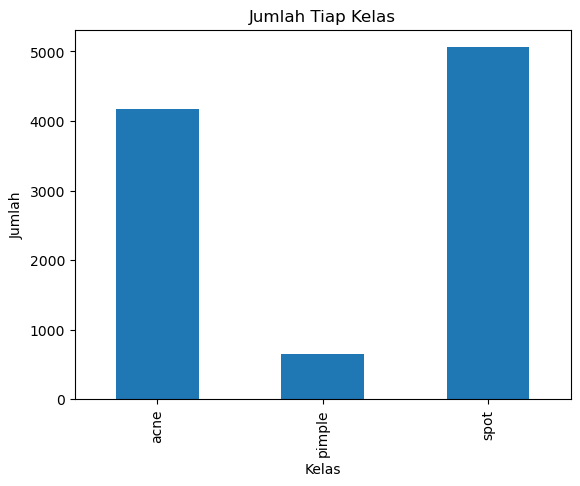

label
acne      4169
pimple     643
spot      5060
Name: label, dtype: int64

In [4]:
counts = df.groupby('label')['label'].count()
counts.plot(kind='bar')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Jumlah Tiap Kelas')

# Menampilkan grafik
plt.show()
counts

### 3.2. <a id='toc3_2_'></a>[Analisis Deskriptif](#toc0_)
**Analisis pada ukuran gambar**

Tabel 1. Analisis deskriptif jumlah ukuran pada tiap-tiap gambar

In [5]:
df[['width','height']].value_counts().reset_index(name='count').T

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
width,512,514,1024,640,1023,900,3112,1000,640,810,...,2084,320,1023,500,799,666,2084,355,487,1218
height,512,514,1024,853,682,1200,3456,1000,852,1080,...,2991,569,878,500,878,883,2990,500,488,2208
count,6668,1374,234,203,53,49,45,35,34,34,...,4,4,3,3,3,3,3,3,1,1


In [6]:
df.groupby(['width','height']).value_counts().reset_index(name='count').describe().T

,count,mean,std,min,25%,50%,75%,max
width,9872.0,575.829923,242.843667,320.0,512.0,512.0,514.0,3112.0
height,9872.0,603.231058,315.438660,408.0,512.0,512.0,514.0,4047.0
xmin,9872.0,280.371860,144.548506,33.0,201.0,264.0,330.0,2536.0
ymin,9872.0,306.814830,205.337257,1.0,177.0,293.0,369.0,3351.0
xmax,9872.0,296.086912,149.002759,46.0,215.0,278.0,346.0,2678.0
ymax,9872.0,321.038493,209.957201,16.0,189.0,306.0,383.0,3434.0
count,9872.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Pada tabel 1 dan 2 dapat disimpulkan sebagai berikut:

**Ukuran Gambar:**
+ Lebar gambar berkisar antara 320 hingga 3112 piksel, dengan rata-rata sekitar 576 piksel dan standar deviasi sekitar 243 piksel. Ini menunjukkan variasi yang signifikan dalam ukuran gambar, dari yang sangat kecil hingga yang sangat besar.
+ Tinggi gambar berkisar antara 408 hingga 4047 piksel, dengan rata-rata sekitar 603 piksel dan standar deviasi sekitar 315 piksel. Variasi yang besar ini menunjukkan variasi yang signifikan dalam dimensi vertikal gambar.

**Koordinat Bounding Box (Xmin, Ymin, Xmax, Ymax):**
+ Koordinat Xmin dan Ymin menandakan sudut kiri atas dari kotak pembatas objek dalam gambar, sedangkan Xmax dan Ymax menandakan sudut kanan bawah dari kotak pembatas tersebut. Ini memungkinkan untuk membatasi area di mana objek terdeteksi dalam gambar.
+ Rata-rata koordinat Xmin adalah sekitar 280 piksel dengan variasi sekitar 145 piksel, sedangkan Ymin adalah sekitar 307 piksel dengan variasi sekitar 205 piksel.
+ Rata-rata koordinat Xmax adalah sekitar 296 piksel dengan variasi sekitar 149 piksel, sedangkan Ymax adalah sekitar 321 piksel dengan variasi sekitar 210 piksel.

**Gambaran Umum:**
+ Jumlah total gambar adalah 9872.
+ Gambar terbesar memiliki lebar 3112 piksel dan tinggi 4047 piksel, sedangkan gambar terkecil memiliki lebar 320 piksel dan tinggi 408 piksel.
+ Terdapat variasi yang signifikan dalam ukuran gambar, dengan 109 variasi ukuran gambar yang diamati.
+ Variasi dalam ukuran gambar tercermin dalam standar deviasi lebar dan tinggi gambar, menunjukkan variasi yang signifikan dari rata-rata.

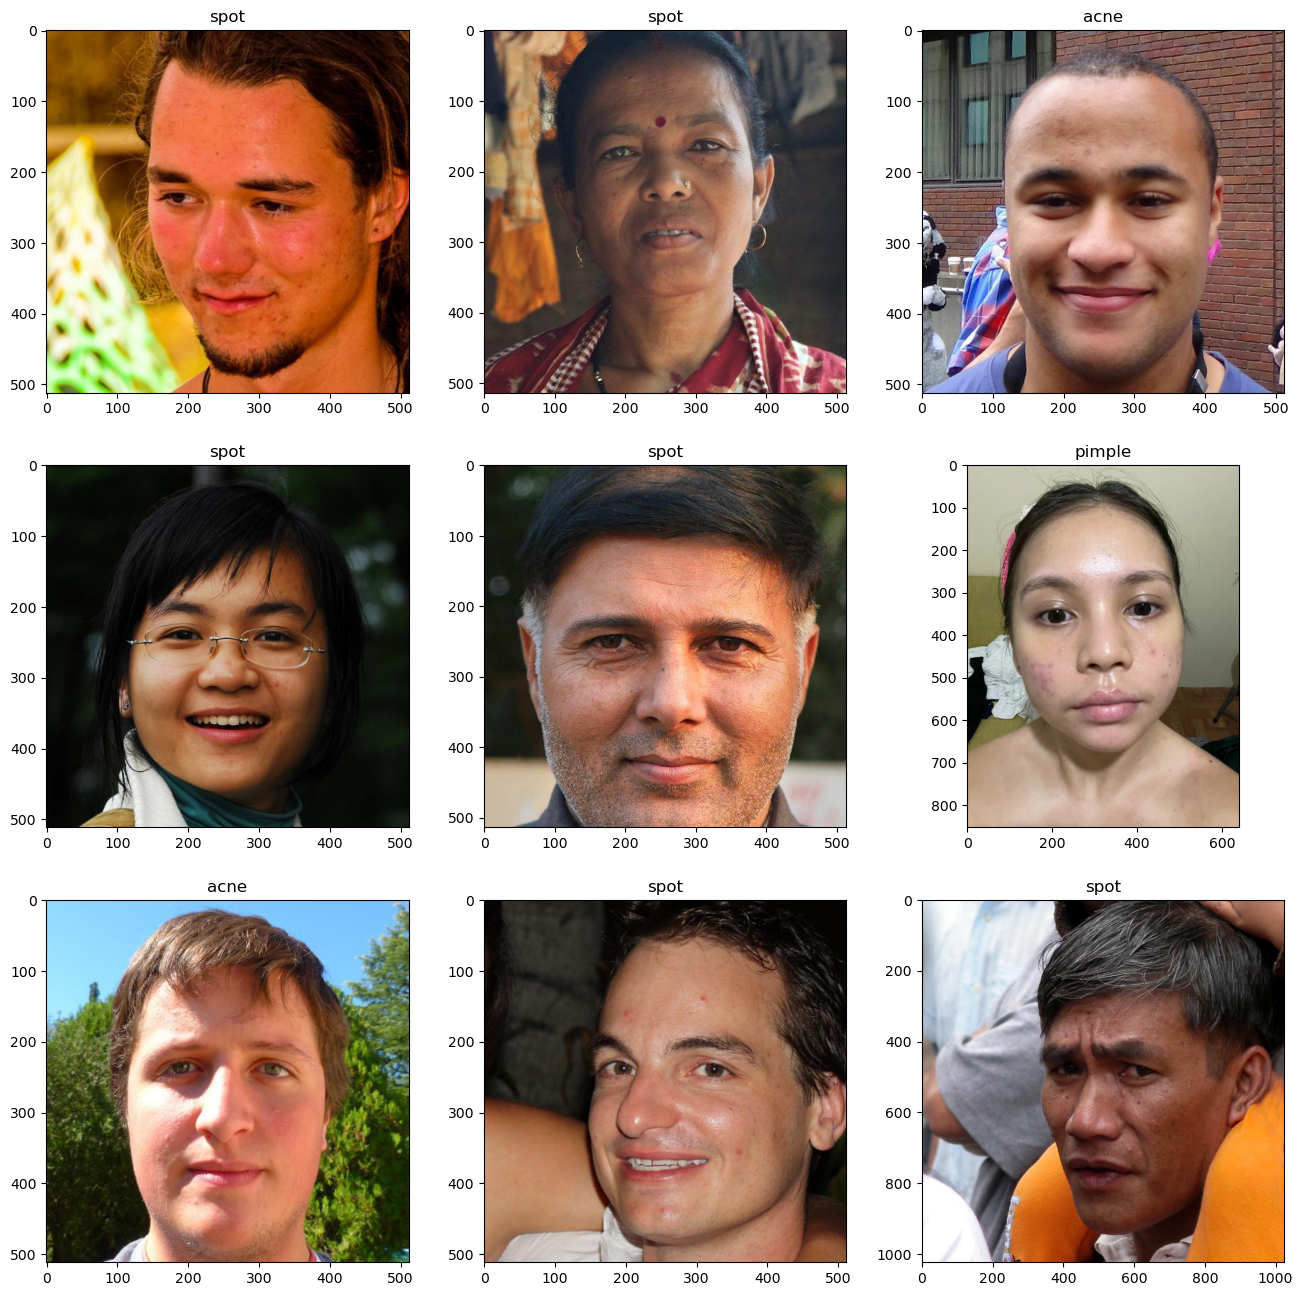

In [7]:
plt.figure(figsize=(16, 16))
for i in range(9):
    idx = random.randint(0, len(df))
    ax=plt.subplot(3,3,i+1)
    ax.title.set_text(f'{df.label[idx]}')
    with fs.open(f'/data/raw/{df.filename[idx]}') as f:
        image = Image.open(f)
        plt.imshow(image)

## 4. <a id='toc4_'></a>[Alur Klasifikasi](#toc0_)

## 5. <a id='toc5_'></a>[Data Preparation](#toc0_)
Sebelum kita melangkah lebih jauh dalam proses pengembangan model klasifikasi jerawat, langkah pertama yang harus dilakukan adalah mempersiapkan data. Data preparation merupakan tahap penting dalam proses machine learning yang mencakup serangkaian langkah, termasuk pengumpulan, pra-pemrosesan, cropping, dan datasplitting. Pada tahap ini, kita memastikan bahwa data yang akan digunakan untuk melatih dan menguji model siap untuk diproses dan memberikan hasil yang optimal.

Setelah proses cropping selesai, langkah selanjutnya adalah melakukan datasplitting menggunakan metode stratified shuffle split. Data yang sudah dipersiapkan dan dipotong akan dibagi menjadi dua subset utama: training set dan test set. Penting untuk dicatat bahwa setiap bagian data akan dikelompokkan berdasarkan kelasnya, yaitu jerawat dan non-jerawat, untuk mempertahankan proporsi yang seimbang.

Setelah datasplitting selesai dilakukan, data akan dimasukkan ke dalam direktori train dan test sesuai dengan kelas masing-masing. Hal ini bertujuan untuk memudahkan proses pelatihan model, di mana model akan belajar dari data pada direktori train, serta proses evaluasi performa model pada direktori test. Dengan cara ini, model dapat mempelajari pola dan fitur yang terkait dengan jerawat dari data latih, sambil diuji dan dievaluasi pada data yang belum pernah dilihat sebelumnya. Proses ini memastikan bahwa model yang dihasilkan memiliki performa yang baik dan dapat diterapkan secara efektif pada data baru.

In [8]:
with fs.open('data/processed/train/_annotations.csv') as f:
    train = pd.read_csv(f)
train

,filename,width,height,label
0,Faisal-Ahmed-is-a-College-student-and-occasion...,13,11,acne
1,39209_png_jpg.rf.67d590c9620b0c72fa7258da27822...,17,15,acne
2,qNALAKx9t8k_jpg.rf.97f47e3e0a6c8a8d6b41b3f73dd...,17,19,spot
3,17326_png_jpg.rf.784b4b1a64a21e3d6014103dc3410...,11,16,acne
4,19190_png_jpg.rf.50417702803905a2e6240d3de19a4...,18,15,pimple
...,...,...,...,...
7892,ANSAR-MONDAL-is-a-Farmer-and-fruit-vendor-fr_j...,10,8,spot
7893,46188_png_jpg.rf.8e6dcb13a47a45c8e9fa14e1c8afe...,14,10,acne
7894,21212_png_jpg.rf.23c1375f60d30554386d81e63916c...,17,18,acne
7895,68869_png_jpg.rf.ce8d6df444f2d06b67d7f6ee53ff7...,19,21,acne


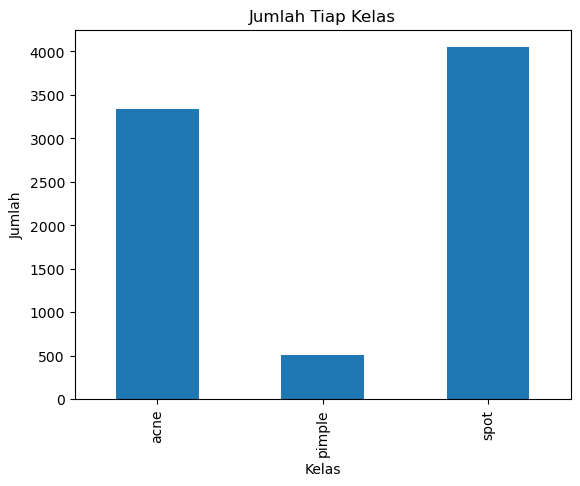

label
acne      3335
pimple     514
spot      4048
Name: label, dtype: int64

In [9]:
train.groupby('label')['label'].count().plot(kind='bar')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Jumlah Tiap Kelas')

# Menampilkan grafik
plt.show()
train.groupby('label')['label'].count()

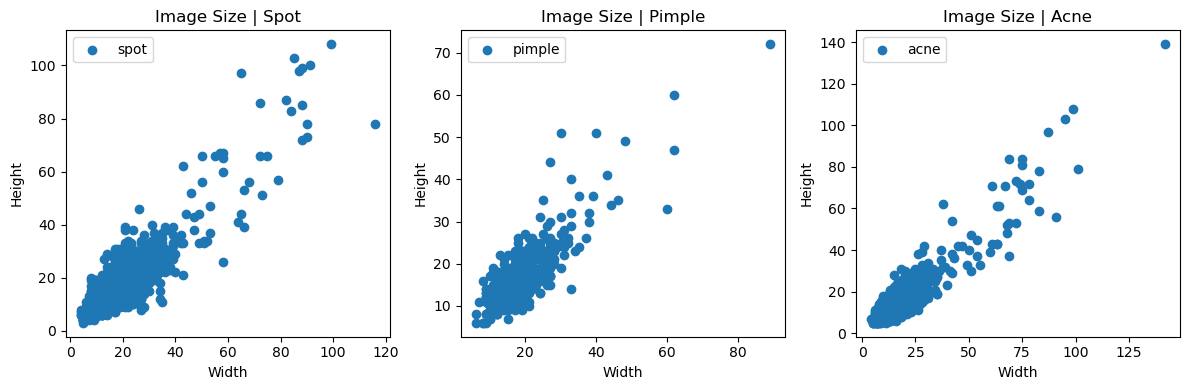

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, label in enumerate(['spot', 'pimple', 'acne']):
    ax = axes[i]
    df = train[train['label'] == label]
    ax.scatter(df['width'], df['height'], label=label)
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_title(f'Image Size | {label.capitalize()}')
    ax.legend()

plt.tight_layout()
plt.show()

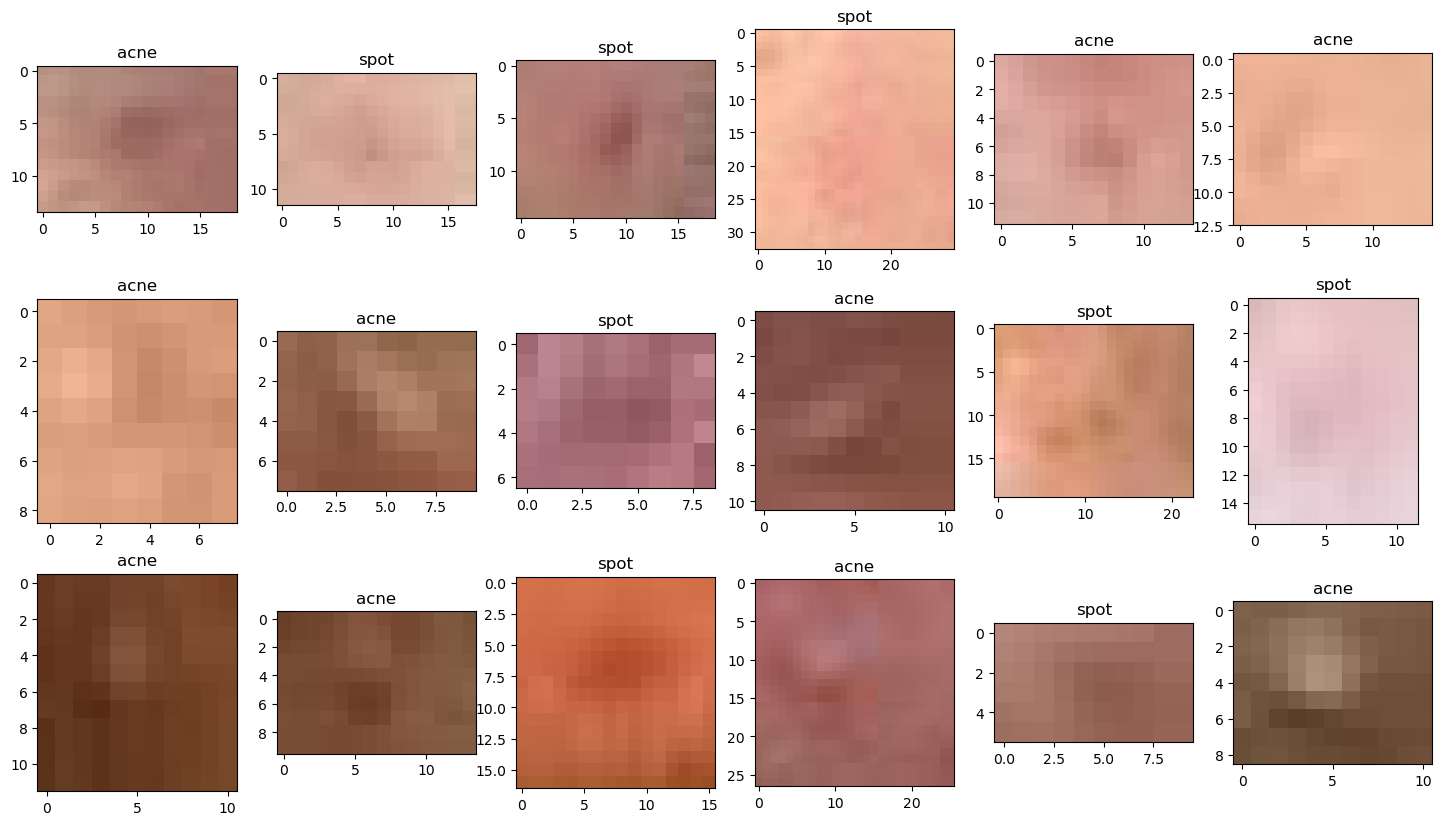

In [11]:
plt.figure(figsize=(18, 10))
for i in range(18):
    idx = random.choice(train.index)
    ax=plt.subplot(3,6,i+1)
    ax.title.set_text(train.label[idx])
    with fs.open(f'/data/processed/train/{train.label[idx]}/{train.filename[idx]}') as f:
        image = Image.open(f)
        plt.imshow(image)

In [12]:
bs = 128

train_transforms = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Resize(80),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(80),
    transforms.ToTensor()
])

if IN_COLAB:
    fs.get('data/processed','data/processed', recursive=True)
    
train_set = datasets.ImageFolder('data/processed/train', train_transforms)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True)
test_set = datasets.ImageFolder('data/processed/test', test_transforms)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)